# KEY FACTORS INFLUENCING COST OF LIVING ACROSS THE WORLD 

## 1. Data Preparation & Derivation: 

Two different datasets have been sourced from https://www.numbeo.com/cost-of-living/ and then merged to cover maximum records with the following fields:
Rank, City, Cost of Living Index, Rent Index, Cost of Living Plus Rent Index, Groceries Index, Restaurant Price Index, Local Purchasing Power Index

Since 'City' column is a combination of (City, State and Country) here, we'll extract 'city' and 'country' separately which would be used to merge with a third related dataset from https://www.kaggle.com/datasets/mvieira101/global-cost-of-living/data

This dataset provided with more information like:
- Meal, Inexpensive Restaurant (USD)
- Meal for 2 People, Mid-range Restaurant, Three-course (USD)
- McMeal at McDonalds (or Equivalent Combo Meal) (USD)
- Domestic Beer (0.5 liter draught, in restaurants) (USD)
- Imported Beer (0.33 liter bottle, in restaurants) (USD)
- Cappuccino (regular, in restaurants) (USD)
- Coke/Pepsi (0.33 liter bottle, in restaurants) (USD)
- Water (0.33 liter bottle, in restaurants) (USD)
- Milk (regular), (1 liter) (USD)
- Loaf of Fresh White Bread (500g) (USD)
- Rice (white), (1kg) (USD)
- Eggs (regular) (12) (USD)
- Local Cheese (1kg) (USD)
- Chicken Fillets (1kg) (USD)
- Beef Round (1kg) (or Equivalent Back Leg Red Meat) (USD)
- Apples (1kg) (USD)
- Banana (1kg) (USD)
- Oranges (1kg) (USD)
- Tomato (1kg) (USD)
- Potato (1kg) (USD)
- Onion (1kg) (USD)
- Lettuce (1 head) (USD)
- Water (1.5 liter bottle, at the market) (USD)
- Bottle of Wine (Mid-Range, at the market) (USD)
- Domestic Beer (0.5 liter bottle, at the market) (USD)
- Imported Beer (0.33 liter bottle, at the market) (USD)
- Cigarettes 20 Pack (Marlboro) (USD)
- One-way Ticket (Local Transport) (USD)
- Monthly Pass (Regular Price) (USD)
- Taxi Start (Normal Tariff) (USD)
- Taxi 1km (Normal Tariff) (USD)
- Taxi 1hour Waiting (Normal Tariff) (USD)
- Gasoline (1 liter) (USD)
- Volkswagen Golf 1.4 90 KW Trendline (Or Equivalent New Car) (USD)
- Toyota Corolla Sedan 1.6l 97kW Comfort (Or Equivalent New Car) (USD)
- Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment (USD)
- 1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans) (USD)
- Internet (60 Mbps or More, Unlimited Data, Cable/ADSL) (USD)
- Fitness Club, Monthly Fee for 1 Adult (USD)
- Tennis Court Rent (1 Hour on Weekend) (USD)
- Cinema, International Release, 1 Seat (USD)
- Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child (USD)
- International Primary School, Yearly for 1 Child (USD)
- 1 Pair of Jeans (Levis 501 Or Similar) (USD)
- 1 Summer Dress in a Chain Store (Zara, H&M, …) (USD)
- 1 Pair of Nike Running Shoes (Mid-Range) (USD)
- 1 Pair of Men Leather Business Shoes (USD)
- Apartment (1 bedroom) in City Centre (USD)
- Apartment (1 bedroom) Outside of Centre (USD)
- Apartment (3 bedrooms) in City Centre (USD)
- Apartment (3 bedrooms) Outside of Centre (USD)
- Price per Square Meter to Buy Apartment in City Centre (USD)
- Price per Square Meter to Buy Apartment Outside of Centre (USD)
- Average Monthly Net Salary (After Tax) (USD)
- Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate



#### - This dataset was merged with the original one to result in one comprehensive data with all the required details.
#### - Since, the column names in the Kaggle dataset were named numerically, they were mapped to their real names in the end.


___________________________________________________________________________________________________________________

In [1]:
# Import the required libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load the Cost of Living Index (coli) data from both sources

df1 = pd.read_csv("Cost_of_Living_Index.csv")
df2 = pd.read_csv("Current_Cost_of_Living_Index.csv")

# Since we want to combine available data for all Cities, so make 'City' as the index in both dataframes
df1 = df1.set_index('City')
df2 = df2.set_index('City')

# Now, combine records from both the dataframes, adding records for new cities if any from df2
coli_df = df1.combine_first(df2)

# Reset the index
coli_df = df1.reset_index()

# Display the combined dataframe
print(coli_df)

                      City  Rank  Cost of Living Index  Rent Index  \
0        Hamilton, Bermuda     1                 140.4        93.6   
1       Basel, Switzerland     2                 130.0        46.4   
2      Zurich, Switzerland     3                 128.5        69.1   
3    Lausanne, Switzerland     4                 120.6        53.4   
4         Zug, Switzerland     5                 119.1        66.7   
..                     ...   ...                   ...         ...   
544            Giza, Egypt   545                  20.3         2.8   
545      Alexandria, Egypt   546                  19.8         3.1   
546       Lahore, Pakistan   547                  19.6         3.3   
547    Islamabad, Pakistan   548                  18.3         4.5   
548      Karachi, Pakistan   549                  18.2         2.9   

     Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                             118.1            144.1                   141.9   

In [3]:
# Now split the column City into City name and Country to align with our third dataset

coli_df['City name'] = coli_df['City'].str.split(', ').str[0]
coli_df['Country'] = coli_df['City'].str.split(', ').str[-1]
    
print(coli_df)

                      City  Rank  Cost of Living Index  Rent Index  \
0        Hamilton, Bermuda     1                 140.4        93.6   
1       Basel, Switzerland     2                 130.0        46.4   
2      Zurich, Switzerland     3                 128.5        69.1   
3    Lausanne, Switzerland     4                 120.6        53.4   
4         Zug, Switzerland     5                 119.1        66.7   
..                     ...   ...                   ...         ...   
544            Giza, Egypt   545                  20.3         2.8   
545      Alexandria, Egypt   546                  19.8         3.1   
546       Lahore, Pakistan   547                  19.6         3.3   
547    Islamabad, Pakistan   548                  18.3         4.5   
548      Karachi, Pakistan   549                  18.2         2.9   

     Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                             118.1            144.1                   141.9   

In [4]:
# Drop the original 'City' column
coli_df = coli_df.drop('City', axis=1)

print(coli_df)

     Rank  Cost of Living Index  Rent Index  Cost of Living Plus Rent Index  \
0       1                 140.4        93.6                           118.1   
1       2                 130.0        46.4                            90.2   
2       3                 128.5        69.1                           100.2   
3       4                 120.6        53.4                            88.6   
4       5                 119.1        66.7                            94.1   
..    ...                   ...         ...                             ...   
544   545                  20.3         2.8                            12.0   
545   546                  19.8         3.1                            11.8   
546   547                  19.6         3.3                            11.8   
547   548                  18.3         4.5                            11.8   
548   549                  18.2         2.9                            10.9   

     Groceries Index  Restaurant Price Index  Local

In [5]:
# Rename 'City name' column as 'City'
coli_df = coli_df.rename(columns={'City name': 'city', 'Country': 'country'})

print(coli_df)

     Rank  Cost of Living Index  Rent Index  Cost of Living Plus Rent Index  \
0       1                 140.4        93.6                           118.1   
1       2                 130.0        46.4                            90.2   
2       3                 128.5        69.1                           100.2   
3       4                 120.6        53.4                            88.6   
4       5                 119.1        66.7                            94.1   
..    ...                   ...         ...                             ...   
544   545                  20.3         2.8                            12.0   
545   546                  19.8         3.1                            11.8   
546   547                  19.6         3.3                            11.8   
547   548                  18.3         4.5                            11.8   
548   549                  18.2         2.9                            10.9   

     Groceries Index  Restaurant Price Index  Local

In [6]:
# Move City and Country columns to 2 and 3 position

# Assign the columns
col_names = coli_df.columns.tolist()

# Creat a sequence with City and Country columns at 2nd and 3rd position
correct_sequence = col_names[:1] + col_names[-2:] + col_names[1:-2]

# Assign the correct sequence to the dataframe to re-arrange
coli_df = coli_df[correct_sequence]

# Display the modified DataFrame
print(coli_df)

     Rank        city      country  Cost of Living Index  Rent Index  \
0       1    Hamilton      Bermuda                 140.4        93.6   
1       2       Basel  Switzerland                 130.0        46.4   
2       3      Zurich  Switzerland                 128.5        69.1   
3       4    Lausanne  Switzerland                 120.6        53.4   
4       5         Zug  Switzerland                 119.1        66.7   
..    ...         ...          ...                   ...         ...   
544   545        Giza        Egypt                  20.3         2.8   
545   546  Alexandria        Egypt                  19.8         3.1   
546   547      Lahore     Pakistan                  19.6         3.3   
547   548   Islamabad     Pakistan                  18.3         4.5   
548   549     Karachi     Pakistan                  18.2         2.9   

     Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                             118.1            144.1   

In [7]:
# Load Cost of Living Prices (colp) data
colp_df = pd.read_csv("Cost_of_Living_Prices.csv")

print(colp_df)
# Set index as City, Country for both the dataframes
coli_df.set_index(['city', 'country'], inplace=True)
colp_df.set_index(['city', 'country'], inplace=True)

# Merge both the dataframes as per City and Country
col_df = coli_df.merge(colp_df, how='inner', left_index=True, right_index=True)

# Reset the index
col_df.reset_index(inplace=True)

# Print the final dataframe
print(col_df)

                    city      country     x1     x2     x3     x4    x5    x6  \
0                  Seoul  South Korea   7.68  53.78   6.15   3.07  4.99  3.93   
1               Shanghai        China   5.69  39.86   5.69   1.14  4.27  3.98   
2              Guangzhou        China   4.13  28.47   4.98   0.85  1.71  3.54   
3                 Mumbai        India   3.68  18.42   3.68   2.46  4.30  2.48   
4                  Delhi        India   4.91  22.11   4.30   1.84  3.68  1.77   
...                  ...          ...    ...    ...    ...    ...   ...   ...   
4951        Peterborough    Australia    NaN    NaN    NaN    NaN   NaN   NaN   
4952          Georgetown    Australia    NaN    NaN    NaN    NaN   NaN   NaN   
4953  Ixtapa Zihuatanejo       Mexico   5.16  30.94  12.89   0.98   NaN  1.80   
4954             Iqaluit       Canada  29.65  74.27  13.71   6.67  8.89  3.71   
4955              Neiafu        Tonga    NaN  29.79  10.64  10.64   NaN   NaN   

        x7    x8  ...     x

In [8]:
# Lets check if we have null values in required columns
print(col_df.isnull().sum())

city                    0
country                 0
Rank                    0
Cost of Living Index    0
Rent Index              0
                       ..
x52                     6
x53                     9
x54                     0
x55                     1
data_quality            0
Length: 65, dtype: int64


In [9]:
# Name numerical column names in col_df appropriately with the correct mapping

# Load the column name file
df = pd.read_csv('Proper_names.csv')

# Map the names using dictionary
map_name = dict(zip(df['Column'], df['Description']))

# Rename columns using the mapping
col_df = col_df.rename(columns=map_name)

# Since data_quality is 1 for all the records now, drop the column
col_df = col_df.drop('data_quality', axis=1)

# Rank also would not be required now, drop the column
col_df = col_df.drop('Rank', axis=1)

# Display the modified dataframe
print(col_df)

           city      country  Cost of Living Index  Rent Index  \
0      Hamilton      Bermuda                 140.4        93.6   
1         Basel  Switzerland                 130.0        46.4   
2        Zurich  Switzerland                 128.5        69.1   
3      Lausanne  Switzerland                 120.6        53.4   
4           Zug  Switzerland                 119.1        66.7   
..          ...          ...                   ...         ...   
483        Giza        Egypt                  20.3         2.8   
484  Alexandria        Egypt                  19.8         3.1   
485      Lahore     Pakistan                  19.6         3.3   
486   Islamabad     Pakistan                  18.3         4.5   
487     Karachi     Pakistan                  18.2         2.9   

     Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                             118.1            144.1                   141.9   
1                              90.2            

## 2. Descriptive Analysis & Exploratory Data Analysis (EDA)

In [10]:
# Print some basic properties of the dataset in hand
col_df.describe()

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,"Meal, Inexpensive Restaurant (USD)","Meal for 2 People, Mid-range Restaurant, Three-course (USD)",McMeal at McDonalds (or Equivalent Combo Meal) (USD),"Domestic Beer (0.5 liter draught, in restaurants) (USD)",...,1 Pair of Nike Running Shoes (Mid-Range) (USD),1 Pair of Men Leather Business Shoes (USD),Apartment (1 bedroom) in City Centre (USD),Apartment (1 bedroom) Outside of Centre (USD),Apartment (3 bedrooms) in City Centre (USD),Apartment (3 bedrooms) Outside of Centre (USD),Price per Square Meter to Buy Apartment in City Centre (USD),Price per Square Meter to Buy Apartment Outside of Centre (USD),Average Monthly Net Salary (After Tax) (USD),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate"
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,...,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,482.000000,479.000000,488.000000,487.000000
mean,56.039344,24.830123,41.182582,50.247131,53.813525,69.068033,11.313197,52.099959,7.516537,3.904262,...,81.647951,93.989939,868.048279,660.447787,1572.739426,1136.192111,4245.108568,2996.650397,2057.158689,5.973470
std,20.048480,16.287176,17.527172,19.418338,24.698421,32.590132,6.177839,24.618715,2.588450,2.205908,...,18.886774,31.621242,620.683970,491.031870,1034.752505,758.597434,3472.625319,2933.877396,1602.196191,4.816349
min,18.200000,2.700000,10.900000,15.300000,12.100000,1.500000,1.300000,7.980000,2.550000,0.700000,...,18.870000,22.250000,68.570000,41.210000,195.350000,116.680000,406.980000,228.930000,35.750000,1.060000
25%,39.050000,12.300000,26.175000,35.650000,32.550000,39.175000,5.780000,32.137500,5.652500,1.957500,...,71.047500,73.050000,432.395000,291.900000,809.395000,568.702500,1831.680000,1229.670000,618.595000,2.700000
50%,58.450000,21.200000,41.150000,48.100000,55.950000,68.750000,11.590000,52.690000,7.380000,3.930000,...,80.390000,94.045000,720.340000,547.560000,1367.420000,959.965000,3301.425000,2201.050000,1597.755000,4.870000
75%,69.200000,33.850000,52.325000,62.925000,70.750000,95.075000,15.810000,66.700000,8.960000,5.270000,...,91.665000,114.077500,1170.552500,933.272500,2093.187500,1536.427500,5625.242500,3814.550000,3126.942500,7.890000
max,140.400000,100.000000,118.100000,144.100000,144.500000,158.300000,32.050000,150.000000,17.630000,12.520000,...,156.880000,215.560000,6678.300000,4996.720000,7146.840000,4325.000000,22067.700000,38723.900000,7935.380000,45.000000


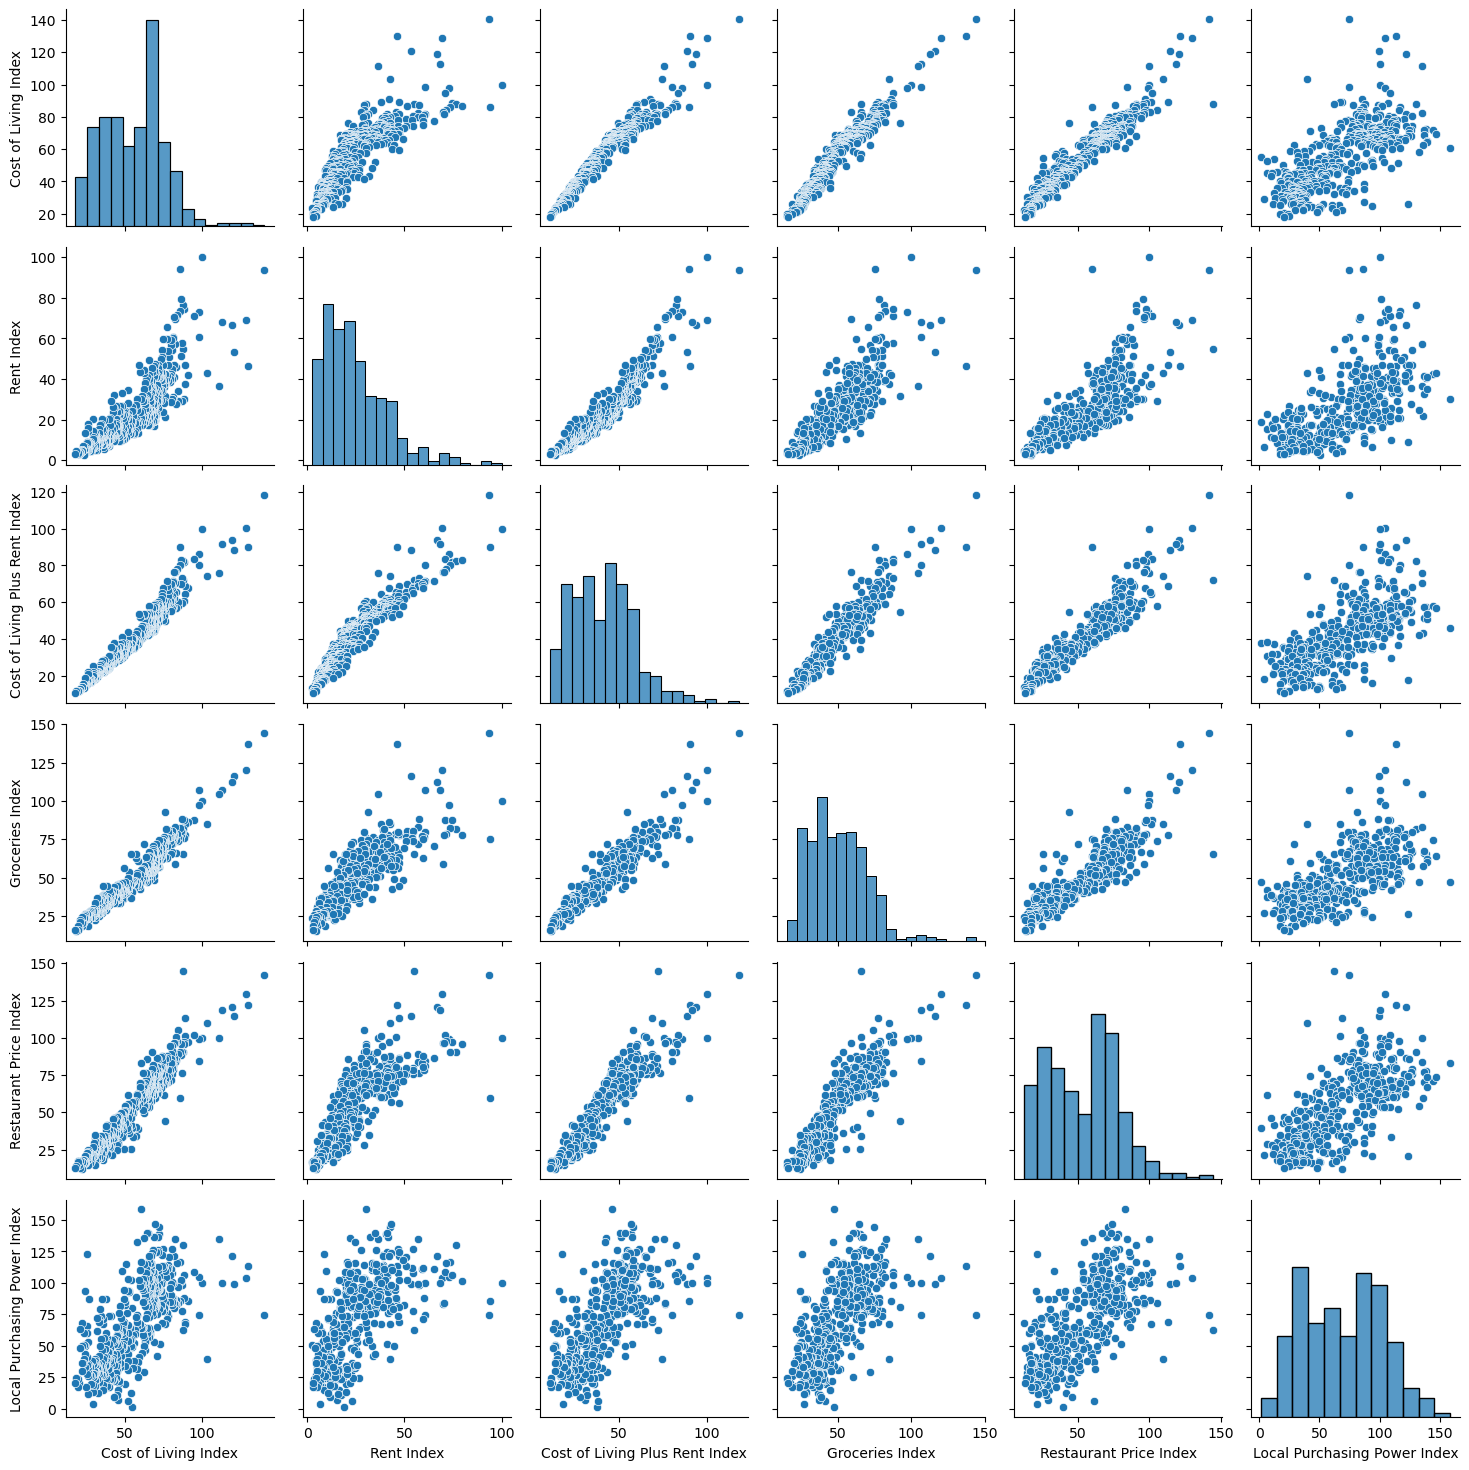

In [11]:
# Let's plot a pair grid and analyse correlation between important indices

plot = sns.PairGrid(col_df.iloc[:,2:8])
plot.map_diag(sns.histplot)
plot.map_offdiag(sns.scatterplot)

# REF: https://seaborn.pydata.org/generated/seaborn.PairGrid.html

#### We notice here that there is a strong correlation between:
- Cost of Living Index Vs. Cost of Living Plus Rent Index (which is obvious)
- Cost of Living Index Vs. Groceries Index
- Cost of Living Index Vs. Restaurant Price Index
- Rent Index Vs. Cost of Living Plus Rent Index (which is again obvious)
- Cost of Living Plus Rent Index Vs. Groceries Index
- Cost of Living Index Vs. Restaurant Price Index




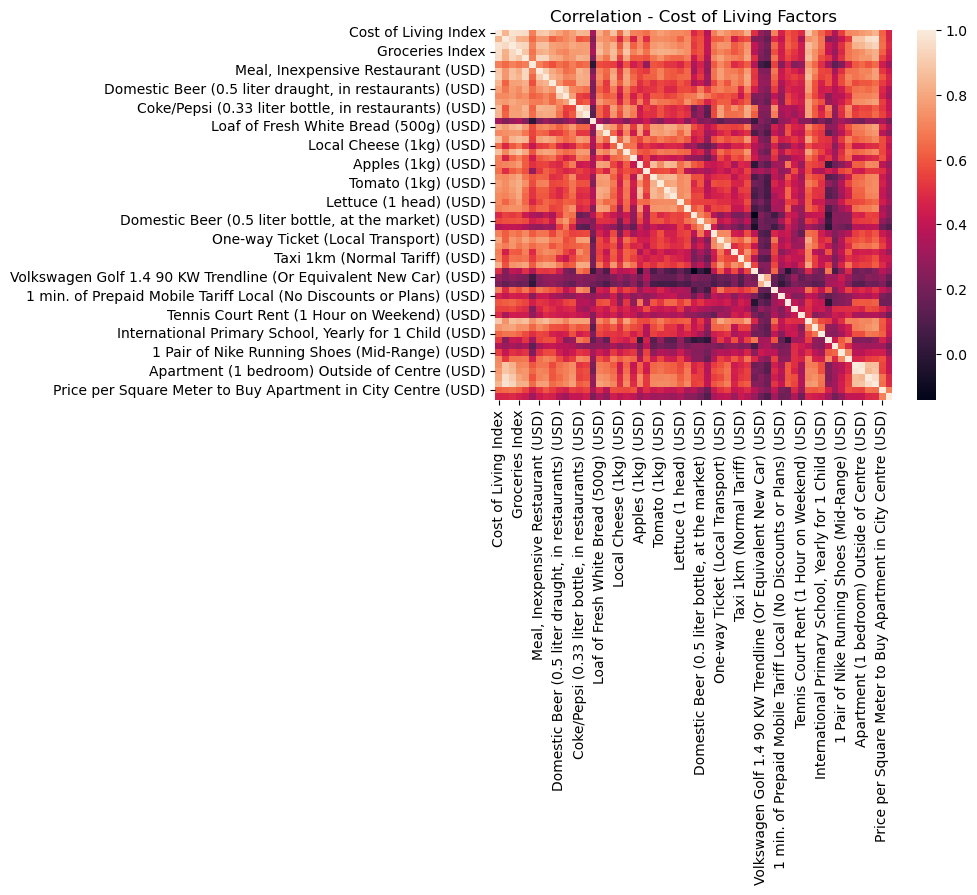

In [12]:
# Correlation matrix of all the indices and individual factors
sns.heatmap(col_df.iloc[:,2:61].corr(),linecolor='white')
plt.title("Correlation - Cost of Living Factors")
plt.show()

#### Some observations from the matrix::

1. We can see that prices related to real estate (like Price of Apartments et al) are fully correlated to Cost of Living Index apart from the obvious Rent Index.

2. Daily grocery items like vegetable and fruit items are correlated to each other

3. 'Cinema International Release, 1 seat (USD)' is strongly related to Cost of Living Indices as well as all factors connected to going out like Meals and drinks in restaurants, local transport, monthly pass and taxi fares



___________________________________________________________________________________________________________________


### Now, let's analyse the relationship of "Local Purchasing Power" with other indices and factors

<Axes: xlabel='Local Purchasing Power Index', ylabel='Average Monthly Net Salary (After Tax) (USD)'>

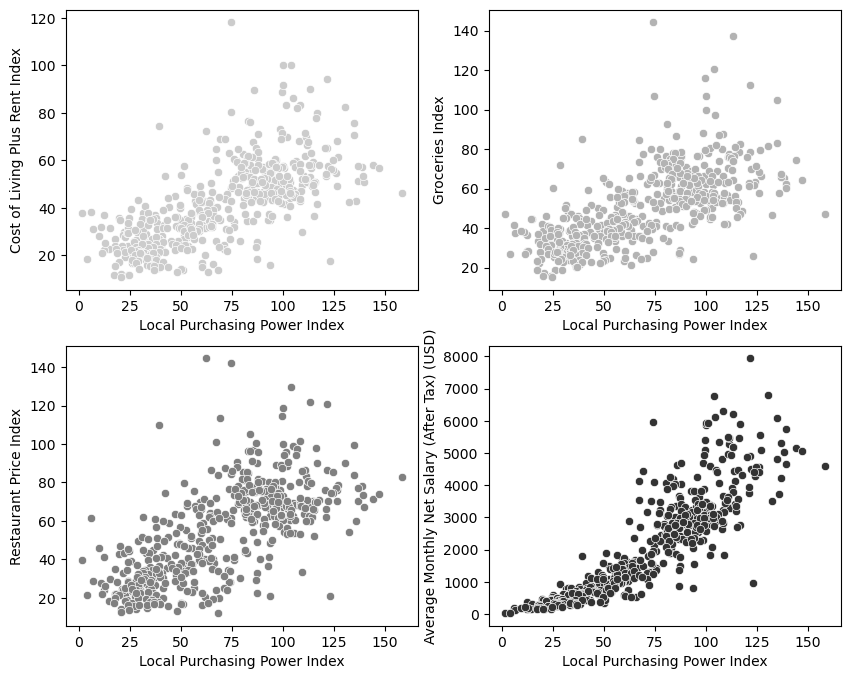

In [13]:
# Plot Scatterplots for: Local Purchasing Power Vs. 
# 1. Cost of Living Plus Rent Index, 2. Groceries Index, 3. Restaurant Price Index, 4. Average Monthly Net Salary (After Tax) (USD)

fig, axs = plt.subplots(2, 2, figsize = (10,8))

sns.scatterplot(data=col_df, x="Local Purchasing Power Index", y="Cost of Living Plus Rent Index", ax=axs[0,0], color="0.8")
sns.scatterplot(data=col_df, x="Local Purchasing Power Index", y="Groceries Index", ax=axs[0,1], color="0.7")
sns.scatterplot(data=col_df, x="Local Purchasing Power Index", y="Restaurant Price Index", ax=axs[1,0], color="0.5")
sns.scatterplot(data=col_df, x="Local Purchasing Power Index", y="Average Monthly Net Salary (After Tax) (USD)", ax=axs[1,1], color="0.2")




Clearly, Avg. Monthly Salary is the only factor slightly influencing Local Purchasing power. Groceries Index and Cost of Living plus Rent index also show slightly vague linear relationship with the said variable if we ignore the outliers but Restaurant Price Index is very scattered comparatively, hence not to be considered.




#### Let's standardize the variables to one scale first
___________________________________________________________________________________________________________________

In [17]:
## STANDARDIZING THE VARIABLES

# Since Avg Monthly Salary is on a larger scale as compared to indices, let's scale our variables to same level

from sklearn.preprocessing import MinMaxScaler

# Extract the numerical columns to be scaled and the categorical columns to be used later
num_cols = col_df.columns[2:] # Index starting from 0, 3rd column number is at index 2
cat_cols = col_df.columns[:2] # Start of index to 2 places

scale = MinMaxScaler()
standard_data = scale.fit_transform(col_df[num_cols])
standard_df = pd.DataFrame(standard_data, columns=num_cols)

# Now, merge with the categorical columns we had initially - City, Country
standard_df = pd.concat([col_df[cat_cols], standard_df], axis=1)

# Print and check the scale for all variables
print(standard_df)

# REF: https://www.includehelp.com/python/sklearn-minmaxscaler-scale-specific-columns-only.aspx

     Cost of Living Index  Rent Index  Cost of Living Plus Rent Index  \
0                1.000000    0.934224                        1.000000   
1                0.914894    0.449126                        0.739739   
2                0.902619    0.682425                        0.833022   
3                0.837971    0.521069                        0.724813   
4                0.825696    0.657760                        0.776119   
..                    ...         ...                             ...   
483              0.017185    0.001028                        0.010261   
484              0.013093    0.004111                        0.008396   
485              0.011457    0.006166                        0.008396   
486              0.000818    0.018499                        0.008396   
487              0.000000    0.002055                        0.000000   

     Groceries Index  Restaurant Price Index  Local Purchasing Power Index  \
0           1.000000                0.980363 

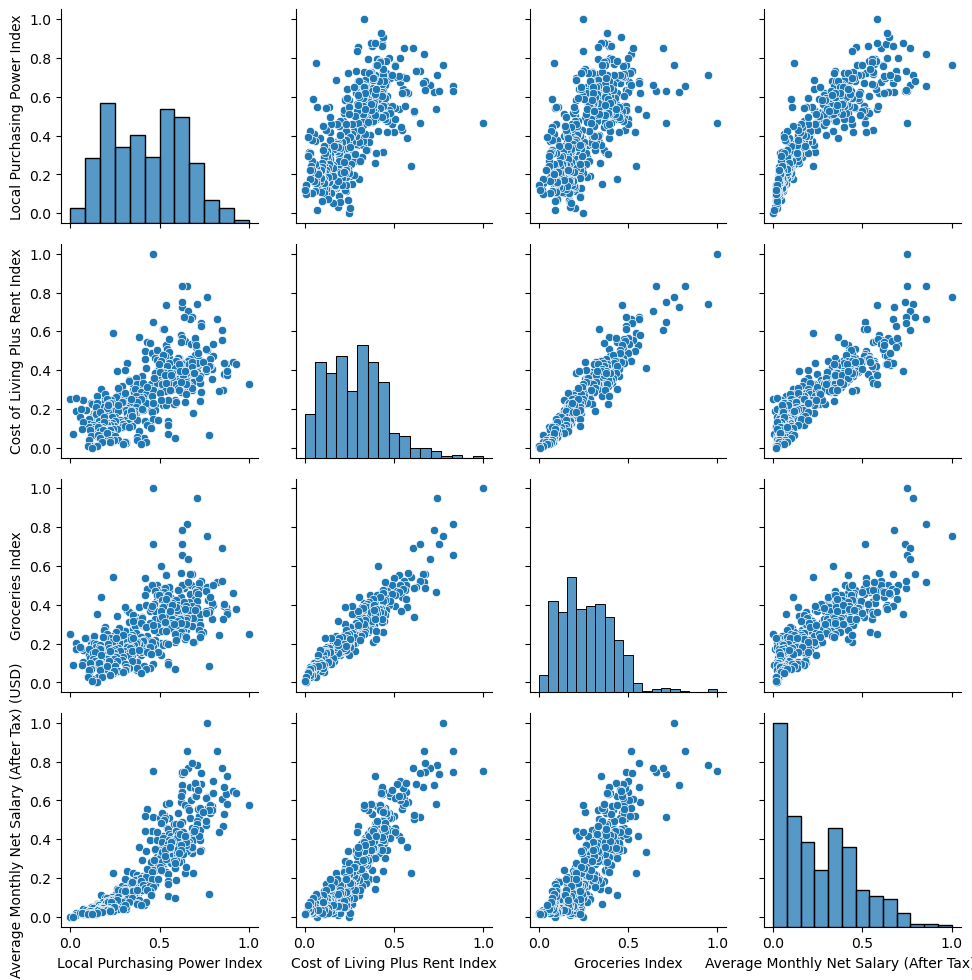

In [18]:
# Visualise all the relevant features again on the same scale

# Select the relevant column names to plot
select = ['Local Purchasing Power Index', 'Cost of Living Plus Rent Index', \
          'Groceries Index', 'Average Monthly Net Salary (After Tax) (USD)']

# Plot a Pair grid for the selected columns
plot = sns.PairGrid(standard_df[select])
plot.map_diag(sns.histplot)
plot.map_offdiag(sns.scatterplot)



From the graph above, Cost of Living Plus Rent Index has the strongest relationship with the Groceries Index.
Apart from that, Avg. monthly salary is the only one common factor influencing almost every other index. 


#### So, now we can create a COMPOSITE INDEX from the Restaurant Price Index and Groceries Index to measure how expensive is it in the food category in each city. 


In [20]:
# Create a Restaurant Plus Grocery Index - a combined one from Restaurant Price Index and Groceries Index 
# assigning weightage based on the previous pair grid - although, the difference was minimal but still 
# Restaurant Price seemed better aligned as compared to Groceries Index so we can give slightly better weightage
# to the Restaurant Price Index

standard_df['Restaurant Plus Grocery Index'] = (standard_df['Restaurant Price Index'] * 0.5 +
                        standard_df['Groceries Index'] * 0.4)

print(standard_df)

           city      country  Cost of Living Index  Rent Index  \
0      Hamilton      Bermuda              1.000000    0.934224   
1         Basel  Switzerland              0.914894    0.449126   
2        Zurich  Switzerland              0.902619    0.682425   
3      Lausanne  Switzerland              0.837971    0.521069   
4           Zug  Switzerland              0.825696    0.657760   
..          ...          ...                   ...         ...   
483        Giza        Egypt              0.017185    0.001028   
484  Alexandria        Egypt              0.013093    0.004111   
485      Lahore     Pakistan              0.011457    0.006166   
486   Islamabad     Pakistan              0.000818    0.018499   
487     Karachi     Pakistan              0.000000    0.002055   

     Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                          1.000000         1.000000                0.980363   
1                          0.739739         0.9

#### Let's find out the relationship between Restaurant Plus Grocery Index and Local Purchasing Power Index

<Axes: xlabel='Restaurant Plus Grocery Index', ylabel='Local Purchasing Power Index'>

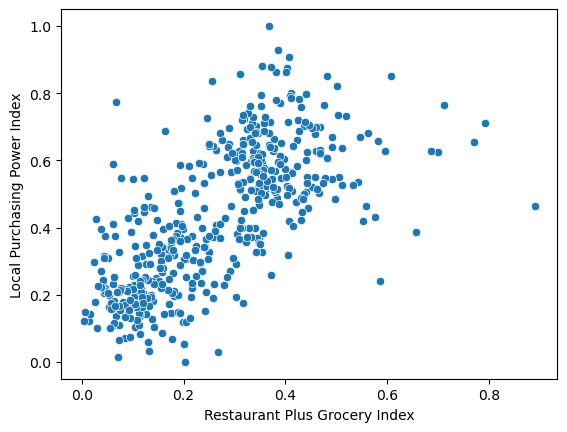

In [27]:
# Plotting a scatter plot comparing both
sns.scatterplot(data=standard_df, x="Restaurant Plus Grocery Index", y="Local Purchasing Power Index")


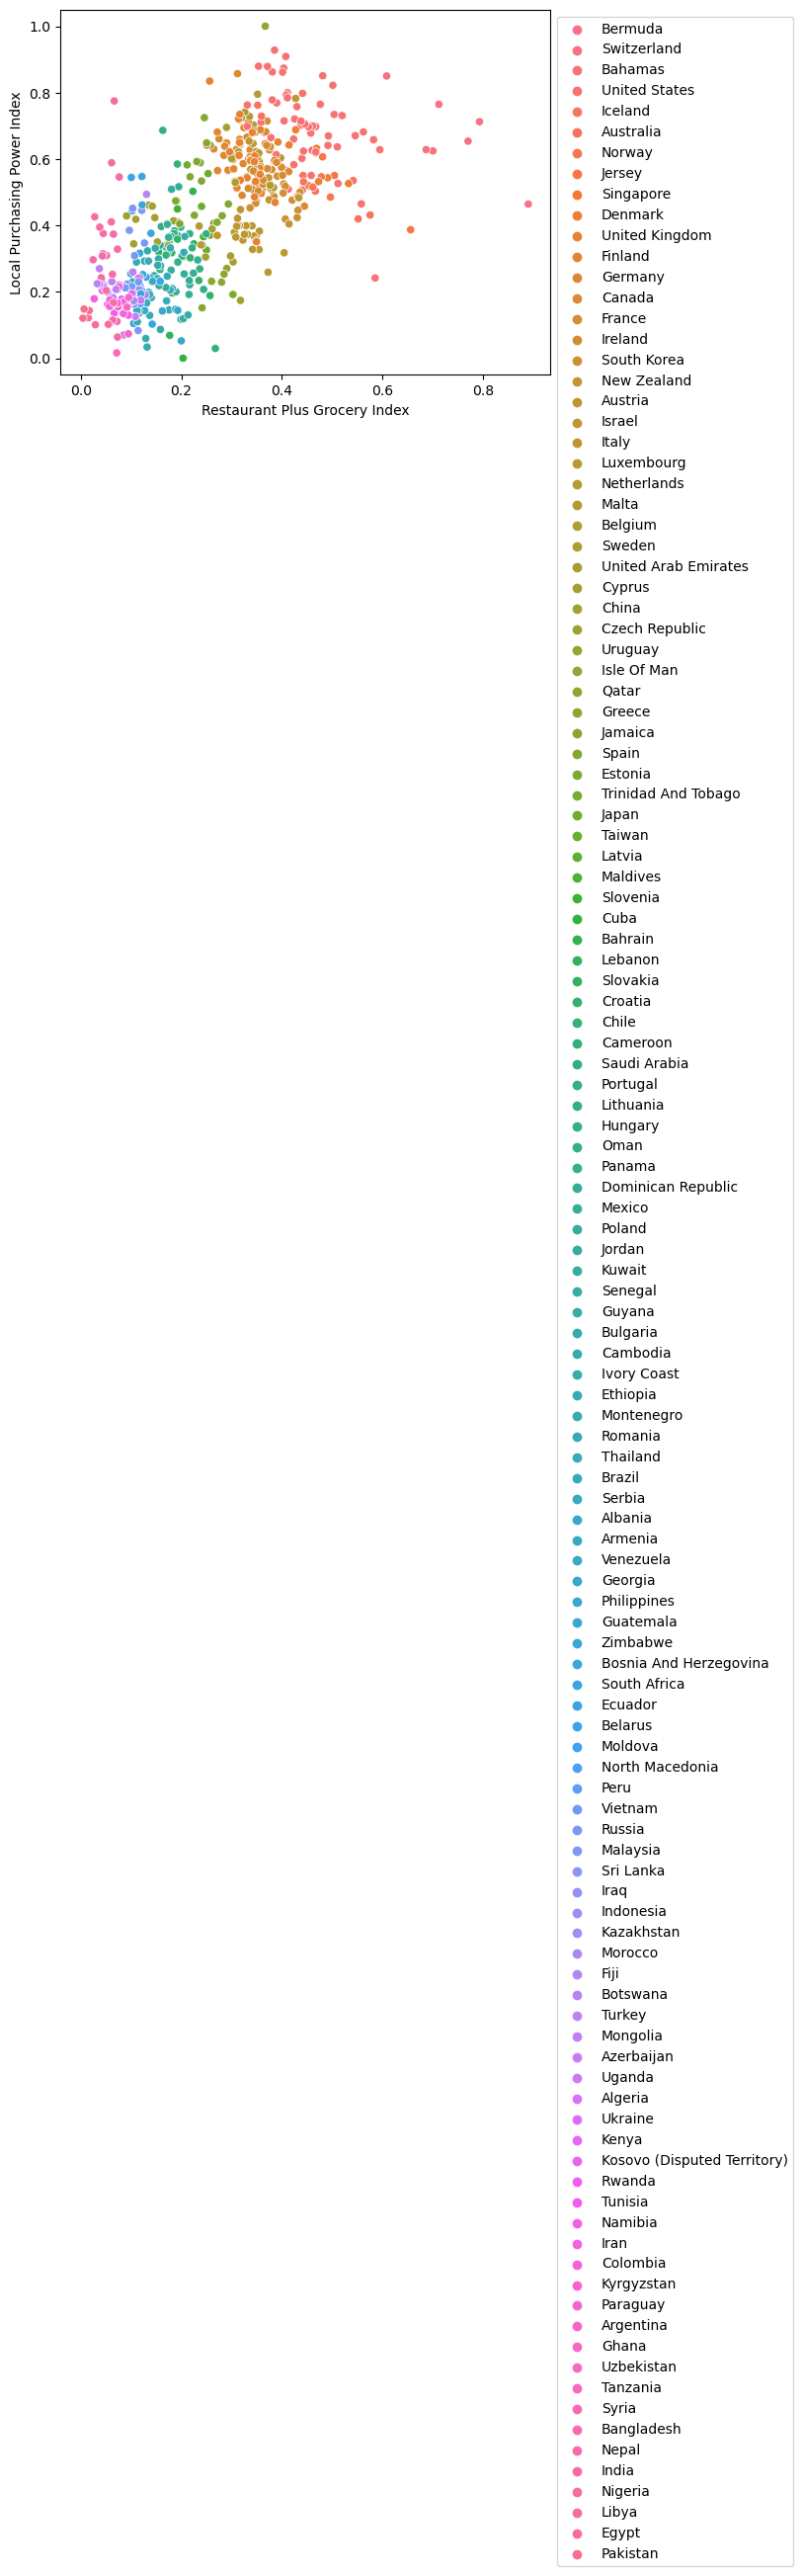

In [28]:
# Plot with the country as hue now
sns.scatterplot(data=standard_df, x="Restaurant Plus Grocery Index", y="Local Purchasing Power Index", hue="country")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# REF: https://seaborn.pydata.org/generated/seaborn.move_legend.html

### Which countries have a higher local purchasing power despite a high cost of living plus rent? Let's find out!

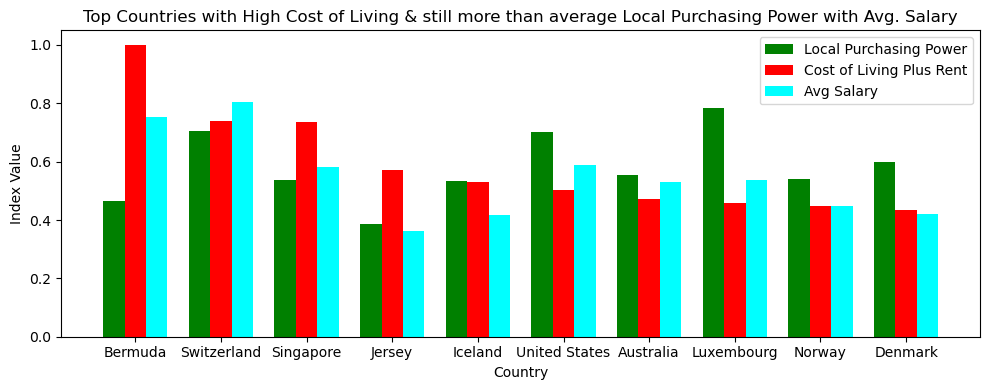

In [75]:
# Group by the respective Country and calculate avg of COLR and LPP
avg = standard_df.groupby('country')[['Local Purchasing Power Index', \
                                              'Cost of Living Plus Rent Index', \
                                     'Average Monthly Net Salary (After Tax) (USD)']].mean().reset_index()

# Assign mean of COLR and LPP as threshold 
lpp_th = avg['Local Purchasing Power Index'].mean()
colr_th = avg['Cost of Living Plus Rent Index'].mean()

# Find out all the countries with higher COLR and LPP
high_lpp_countries = avg[avg['Local Purchasing Power Index'] > lpp_th]
high_colr_countries = avg[avg['Cost of Living Plus Rent Index'] > colr_th]

# Merge the results where we're getting either high COLR or LPP
high_lpp_colr_countries = pd.merge(high_lpp_countries, high_colr_countries, how='inner', on='country')


# Filter out countries which have both high COLR and LPP when compared to avg values
high_lpp_colr_countries = high_lpp_colr_countries[
    (high_lpp_colr_countries['Local Purchasing Power Index_x'] > lpp_th) & \
    (high_lpp_colr_countries['Cost of Living Plus Rent Index_y'] > colr_th)
]

# Sort the records with high COLR at the top
high_lpp_colr_countries = high_lpp_colr_countries.sort_values(by='Cost of Living Plus Rent Index_y', ascending=False)

# Select top 10 records
top_10 = high_lpp_colr_countries.head(10)

# Plot the COLR, LPP and respective salaries for the top 10 countries COLR Index-wise
plt.figure(figsize=(10, 4))

bar_width = 0.25
w1 = range(len(top_10))
w2 = [x + bar_width for x in w1]
w3 = [x + bar_width for x in w2]
# Plot bars
plt.bar(w1, top_10['Local Purchasing Power Index_x'], color='green', width=bar_width, \
        label='Local Purchasing Power')
plt.bar(w2, top_10['Cost of Living Plus Rent Index_y'], color='red', width=bar_width, \
        label='Cost of Living Plus Rent')
plt.bar(w3, top_10['Average Monthly Net Salary (After Tax) (USD)_y'], color='cyan', width=bar_width, \
        label='Avg Salary')


# Set labels and title
plt.xlabel('Country')
plt.ylabel('Index Value')
plt.title('Top Countries with High Cost of Living & still more than average Local Purchasing Power with Avg. Salary')
plt.xticks([r + bar_width for r in range(len(top_10))], top_10['country'])

# Show legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# REF: Guidance from chatgpt

### We can observe that in case of countries like Luxembourg, United States, Denmark, Norway and Australia respectively, the Local Purchasing power actually exceeds the Cost of Living Plus Rent.

This may be attributed to higher Average Salaries in most of those countries. 

#### However, it is interesting to note that despite much higher salaries, people in Switzerland exhibit lesser Local Purchasing Power in the wake of high Cost of Living Plus Rent. 

## 3. Construction of Model - KMeans Clustering

In [46]:
# Let us use cluster algorithm to identify patterns between Local Purchasing Power & Cost of Living Plus Rent Index

# Import the required libraries
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assign the required features for clustering
X = standard_df[['Cost of Living Plus Rent Index', 'Local Purchasing Power Index']]

# Split into train and test sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=123)

# Form clusters in the train set using KMeans - train your model
kmeans = KMeans(n_clusters=5, random_state=123)
X_train['Group'] = kmeans.fit_predict(X_train)



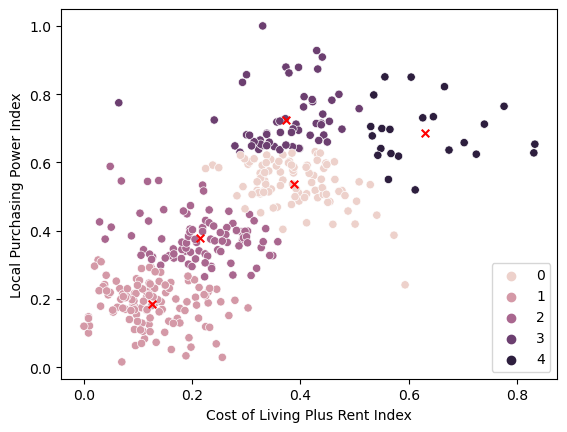

In [47]:
# Plot the trained clusters on a scatterplot

sns.scatterplot(data = X_train, x = 'Cost of Living Plus Rent Index', y = 'Local Purchasing Power Index', \
                hue = kmeans.labels_)

# REF: https://www.datacamp.com/tutorial/k-means-clustering-python

# Plot centroids on top of the scatterplot
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=30, c='red', \
            marker='x')

# REF: https://stackoverflow.com/questions/61181342/how-to-graph-centroids-with-kmeans

## 4. Validation of Results

Training Silhouette Score: 0.4108588306184031
Test Silhouette Score: 0.39819679451904316


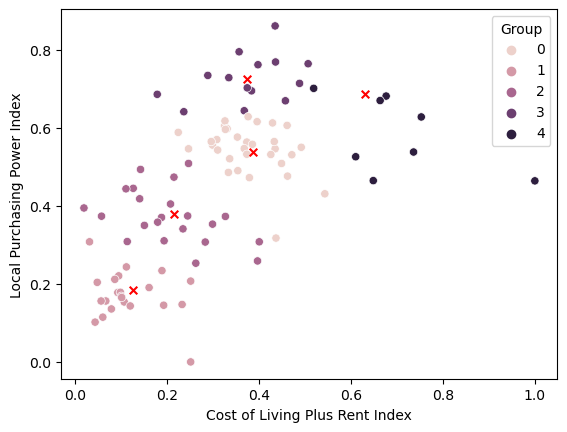

In [48]:
# Predict results on the test data
X_test['Group'] = kmeans.predict(X_test)

# Plot the results from test data and plot centroids
sns.scatterplot(data = X_test, x = 'Cost of Living Plus Rent Index', y = 'Local Purchasing Power Index', \
                hue = 'Group')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=30, c='red', \
            marker='x')

# Evaluate the model's performance
train_score = silhouette_score(X_train[['Cost of Living Plus Rent Index', 'Local Purchasing Power Index']], \
                               X_train['Group'])
test_score = silhouette_score(X_test[['Cost of Living Plus Rent Index', 'Local Purchasing Power Index']], \
                              X_test['Group'])

print(f"Training Silhouette Score: {train_score}")
print(f"Test Silhouette Score: {test_score}")